In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

In [18]:
def f(x):
    return (np.log(x) + (x-6)**3 - 4*x + 30)

def fprime(x):
    return (1/x + 3*(x-6)**2 - 4)

def neg_f(x):
    return -f(x)

def fpprime(x):
    return (-1/x**2 + 6*(x-6))

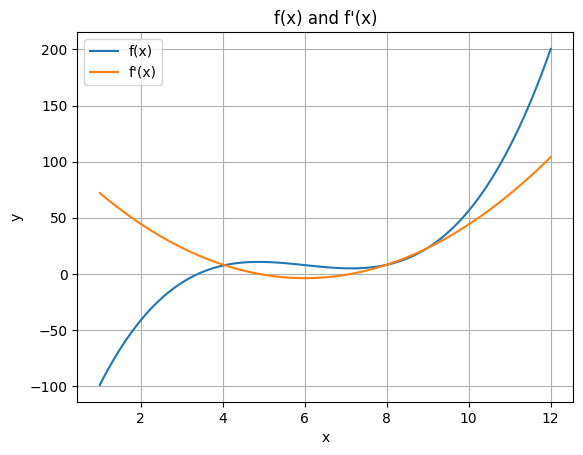

In [19]:
x_axis = np.linspace(1, 12, 100)
reg_plot = []
derivative_plot = []
for x in x_axis:
    reg_plot.append(f(x))
    derivative_plot.append(fprime(x))
plt.plot(x_axis, reg_plot, label = "f(x)")
plt.plot(x_axis, derivative_plot, label = "f'(x)")
plt.xlabel('x')
plt.ylabel('y')
plt.title('f(x) and f\'(x)')
plt.legend()
plt.grid()
plt.show()

In [20]:
def newton_raphson(f,fp, initial_guess, tolerance=1e-9 , max_iteration=100):
    """
    This function will apply the Newton-Raphson method to find the root of a given function
    Parameters:
    ------------
    f : function
       The original function we wanted to find roots
    fp : function
        The first order derivative of the original function
    initial_guess: list
        A list of starting points. 
    tolerance : float, optional
        defines how close to zero needs to be
    max_iteration : int
        defines maximum iterations if not converge
    Return:
    roots : list
        a list of roots found
    """
    roots = [ ]

    for x0 in initial_guess:
        x = x0
        fx = f(x)
        fpx = fp(x)
        iteration = 0
        # continue the iteration until stopping conditions are met
        while (abs(f(x)) > tolerance) and (iteration < max_iteration):
            x = x - fx/fpx
            fx = f(x)
            fpx = fp(x)
            iteration += 1
    
        if abs(f(x)) < tolerance:
            roots.append(np.round(x,3))
            
    return roots

In [21]:
res_1 = newton_raphson(f, fprime, [4])
print(res_1)

# 1.7. use the Newton-Raphson method to find the maximum value on the domain [4, 8], name the returned variable as res_2
# 1.8. use the newton-raphson method to find the minimum value on the domain [4, 8], name the returned variable as res_3
tmp = newton_raphson(fprime, fpprime, [4, 8])
pts = []
for pt in tmp:
    pts.append(f(pt))
res_2 = max(pts)
res_3 = min(pts)

[np.float64(3.397)]


In [47]:
from scipy.optimize import root
from scipy.optimize import minimize

'''
1.9
a) find the root of f(x), store the result in variable res_4
b) find minimumn value of f(x) on the domain [4, 8], name the returned var as res_5
c) find maximum value of f(x) on the domain [4, 8], name the returned var as res_6

'''

res_4 = root(f, 2).x[0]
print(res_4)

res_5 = f(minimize(f, 8).x[0])
print(res_5)

res_6 = f(minimize(neg_f, 4).x[0])
print(res_6)




3.3971213903325577
4.887145908362903
10.660292274880788


In [23]:
def utility(A, B, alpha):
    return (B**alpha * A**(1-alpha))

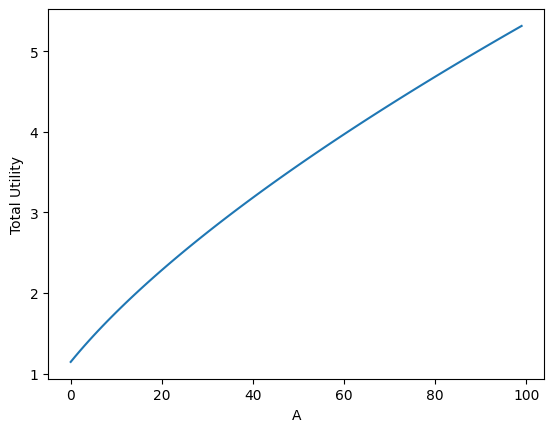

In [24]:
'''
2.2. Set the parameter alpha = 1/3, Assume the consumer always consume 1.5 units of B.
plot the relationship between A (x-axis) and total utility (y-axis), set the range of A between 1 and 10
'''
tot_utility = []
x_range = np.linspace(1, 10, 100)
for x in x_range:
	tot_utility.append(utility(x,1.5,1/3))

plt.plot(range(100), tot_utility)
plt.xlabel('A')
plt.ylabel('Total Utility')
plt.show()

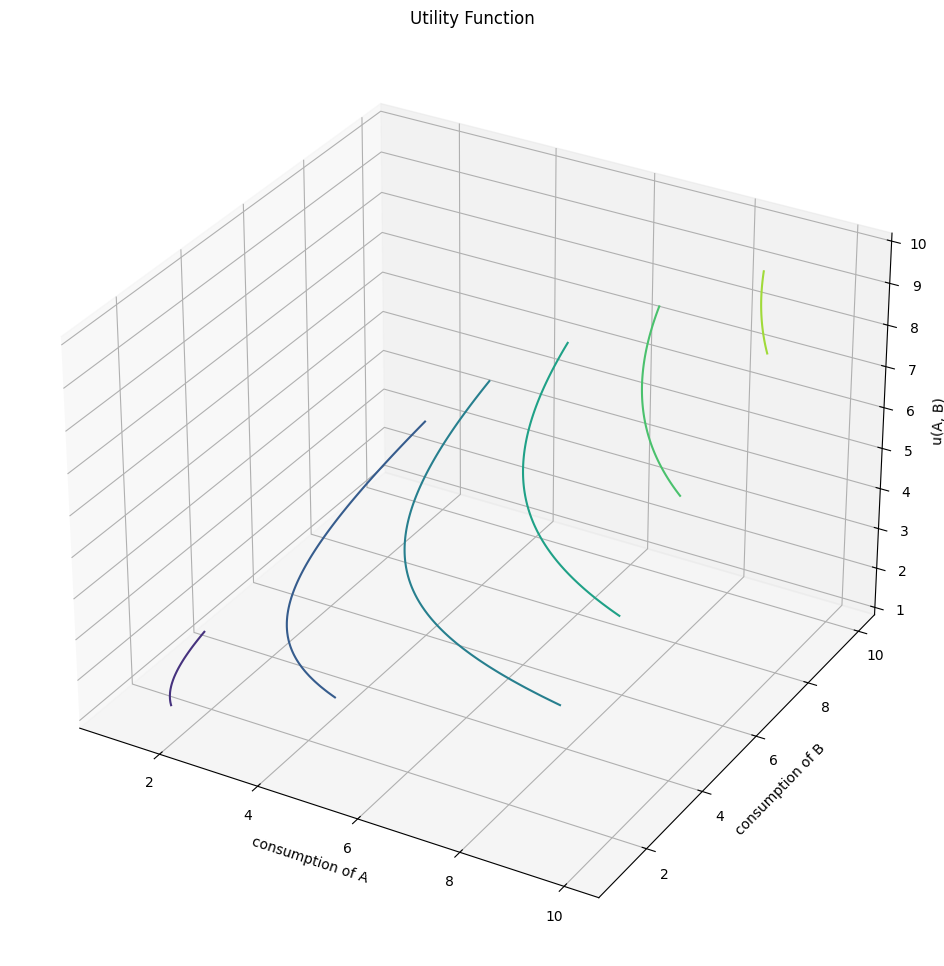

In [44]:
# 2.3. plot the 3-dimensional utility function
# 3-d view of utility
A = np.linspace(1, 10, 100)
B = np.linspace(1, 10 ,100).reshape((100,1))
A, B = np.meshgrid(A, B)
u_level = utility(A, B, 1/3)
def plot_utility_3d(A, B, u_level):
    fig = plt.figure(figsize=(12, 12))
    ax_3d = fig.add_subplot(111, projection='3d')
    ax_3d.contour3D(A, B, u_level, cmap='viridis')
    ax_3d.set_xlabel('consumption of A')
    ax_3d.set_ylabel('consumption of B')
    ax_3d.set_zlabel('u(A, B)')
    ax_3d.set_title('Utility Function')
    plt.show()
    
plot_utility_3d(A, B, u_level)

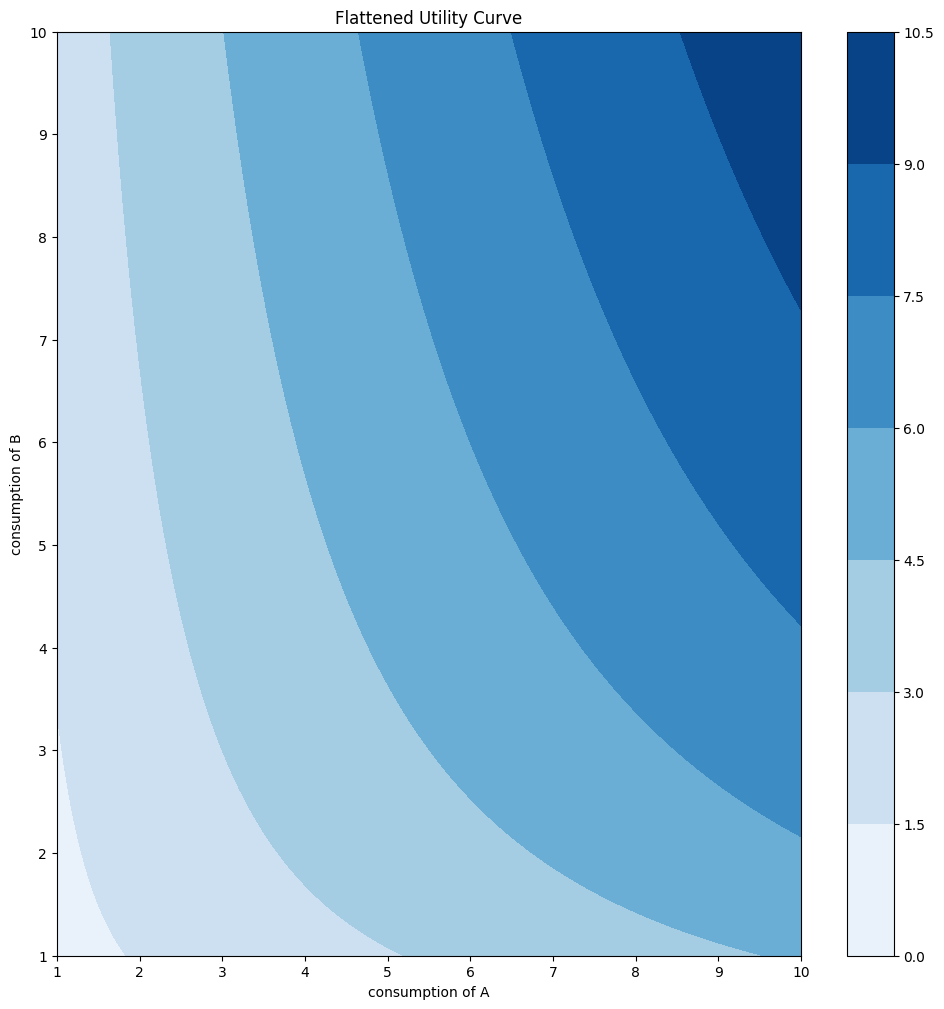

In [46]:
# 2.4.plot the utility curve on a "flatten view"
A = np.linspace(1, 10, 100)
B = np.linspace(1, 10 ,100).reshape((100,1))
u_level = utility(A, B, 1/3)
def plot_utility_flat(A, B, u_level):
    fig = plt.figure(figsize=(12,12))
    ax1 = fig.add_subplot(1,1,1)
    contours=ax1.contourf(A,B.flatten(), u_level, cmap=plt.cm.Blues)
    fig.colorbar(contours)
    ax1.set_xlabel('consumption of A')
    ax1.set_ylabel('consumption of B')
    ax1.set_title('Flattened Utility Curve')
    plt.show()
    
plot_utility_flat(A, B, u_level)

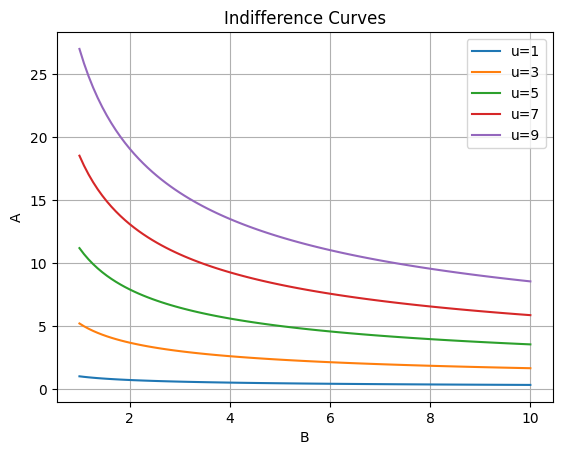

In [27]:
# 2.5. from the given utitlity function, derive A as a function of B, alpha, and U
# plot the indifferences curves for u=1,3,5,7,9 on the same figure.
# Put B on the x-axis, and A on the y-axis
def A_indifference(B, ubar, alpha=1/3):
    return (ubar/(B**alpha))**(1/(1-alpha))

def plot_indifference_curves(ax, alpha=1/3):
    B = np.linspace(1,10,100)
    utility_levels = [1, 3, 5, 7, 9]
    for ubar in utility_levels:
        A = A_indifference(B, ubar, alpha)
        ax.plot(B, A, label=f'u={ubar}')
    ax.set_xlabel('B')
    ax.set_ylabel('A')
    ax.set_title('Indifference Curves')
    ax.grid()
    ax.legend()

fig, ax = plt.subplots()
plot_indifference_curves(ax)

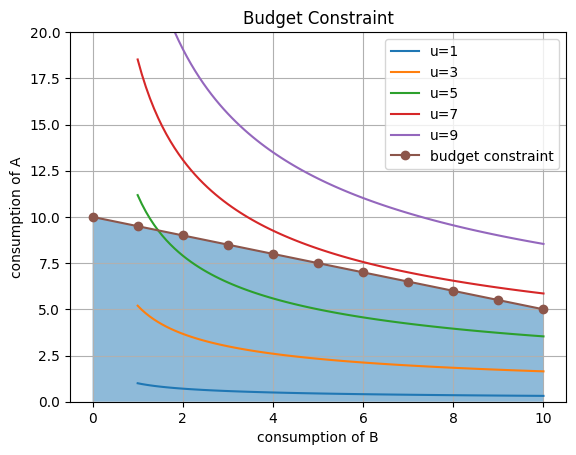

In [40]:
# 2.6.suppose pa = 2, pb = 1, Income W = 20,
# Add the budget constraint to the previous figure
def A_bc(B, W, pa, pb):
	return (W - (pb*B))/pa

def plot_budget_constraint(ax, W, pa, pb):
	A = np.linspace(0, W/pa, 11)
	B = A_bc(A, W, pa, pb)
	ax.plot(A,B,label='budget constraint', marker='o')
	ax.fill_between(A, B, alpha=0.5)
	ax.set_xlabel('consumption of B')
	ax.set_ylabel('consumption of A')
	ax.set_title('Budget Constraint')
	plt.ylim(0, W/pb)
	ax.legend()
	return ax

# plot the budget constraint
# fig = plt.figure(figsize=(12, 12))
fig, ax = plt.subplots()
plot_indifference_curves(ax)
# ax = fig.add_subplot(1, 1, 1)
plot_budget_constraint(ax, 20, 2, 1)
plt.show()

In [42]:
# 2.7. find the optimized consumption bundle and maximized utility
def objective(B, W=20, pa=2, pb=1):
    B = np.linspace(0, W/pb, int(W/pb)+1)
    for u_bar in [9,7,5,3,1]:
        for b in B:
            if A_bc(b, W, pa, pb) >= A_indifference(b, ubar=u_bar, alpha=1/3):
                return b, ((W-b*pb)/pa), u_bar

optimal_B, optimal_A, optimal_U = objective(None)
print(optimal_A, optimal_B, optimal_U)

9.0 2.0 5


C:\Users\njind\AppData\Local\Temp\ipykernel_25724\357803174.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  return (ubar/(B**alpha))**(1/(1-alpha))
